# Intro to PyTesseract

In [1]:
import pytesseract
from PIL import Image   

In [2]:
img_file = 'data/page_01.jpg'
no_noise = 'temp/no_noise.jpg'

In [3]:
img = Image.open(no_noise)

In [4]:
ocr_result = pytesseract.image_to_string(img)

In [5]:
print(ocr_result)

“GABRIEL Meamall

On Easter morning in the year 1944, I took my six-year-old
son by the hand and began walking fron my home town toward the
valleys and forests of the Carpathi2n mountains. For nearly
eight months we lived in barns, attics and makeshift eabins. With
the pene nous nelp of an unusually courageous man, we managed to
survive Europe's greatest fit of madness. Those who walked in
the opposite direction on that Easter day were lese fortunate.
They were taken in trainloads to places whose once obscure names
are now, and forever will be, synonymous with terror, evil and
death. What follows is our story of survival told to the best
of my ability, in plain, simple language.

In March of 1944 the SS troops took over the internal affairs
of Hungary and proceeded to organize the deportation of the dows.
To the Nazie thie was a routine assignment; within hours all local
officials were informed of operational plans. The high command
issued a directive designed to placate Jewish fears a

### OCR an index

In [6]:
import pytesseract
from PIL import Image

In [7]:
image_file = 'data/index_02.jpg'
img = Image.open(image_file)

In [8]:
ocr_result = pytesseract.image_to_string(img)

In [9]:
print(ocr_result)

INDEX NOMINUM.

SCRIPSIT KAROLUS HAMPE.

Maior numerus indicat paginam, minor lineam.

A.v. E.

Aaron 38, 20. 123, 18. 168, 6. 203, 38. |

Abacue propheta 36, 5. 319,29. 373, 23.
Abagarus rex Edessenorum 382, 13.
Abdenago 585, 3.

Abel 26, 11.

Abigail 606, 6.

Abraham 26,18. 124,18. 133, 23, 2:
264. 302, 13. 303, 13. 320, 40. 328, 1.
496, 22.

Absalon 102, 5.

Acgfredi v. Ecgfridus.

Achab rex 504, 1.

Achaz rex 504,1.

Achiel 606, 19.

Achilon 496, 26.

Adal-, Adel-, Adhel-, Aedel-, Aedel-,
‘Aedil-, Aed
Athel-, Athil-, Aethel-, Aethil-
Ethel-.

Aedelbaldusabb.S. Petri Wiremuthen-
sis et S. Pauli Girwensis 110, 28.

Aedilberctus, Aedilberthus ep. Ha-
gulstadensis, antea ep. Candidae
casae sive Witernensis 27,43. 72,16.

Adalbertus, Aedilberctus sive Magus,
discipulus et capellanus Arnonis
archiep. Salisburg., postea_abb.
Ferrariensis 254, 1. 320, 41. 322, 19.
416. 418, 14. 422, 10.

Adalpertabb. [Tegernseensis ?]497,2.

Adalbertus presb. monasterii 8. Mar-
tini Turonensis 399, 3.

Aed

### Bounding Boxes

Identifying components and columns in an image with several columns with Latin text.

In [10]:
import pytesseract
import cv2

In [11]:
image = cv2.imread('data/index_02.jpg')
base_image = image.copy()

In [12]:
# We convert our image into a scale of colors to gray
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

file = 'temp/index_gray.png'
cv2.imwrite(file, gray)

True

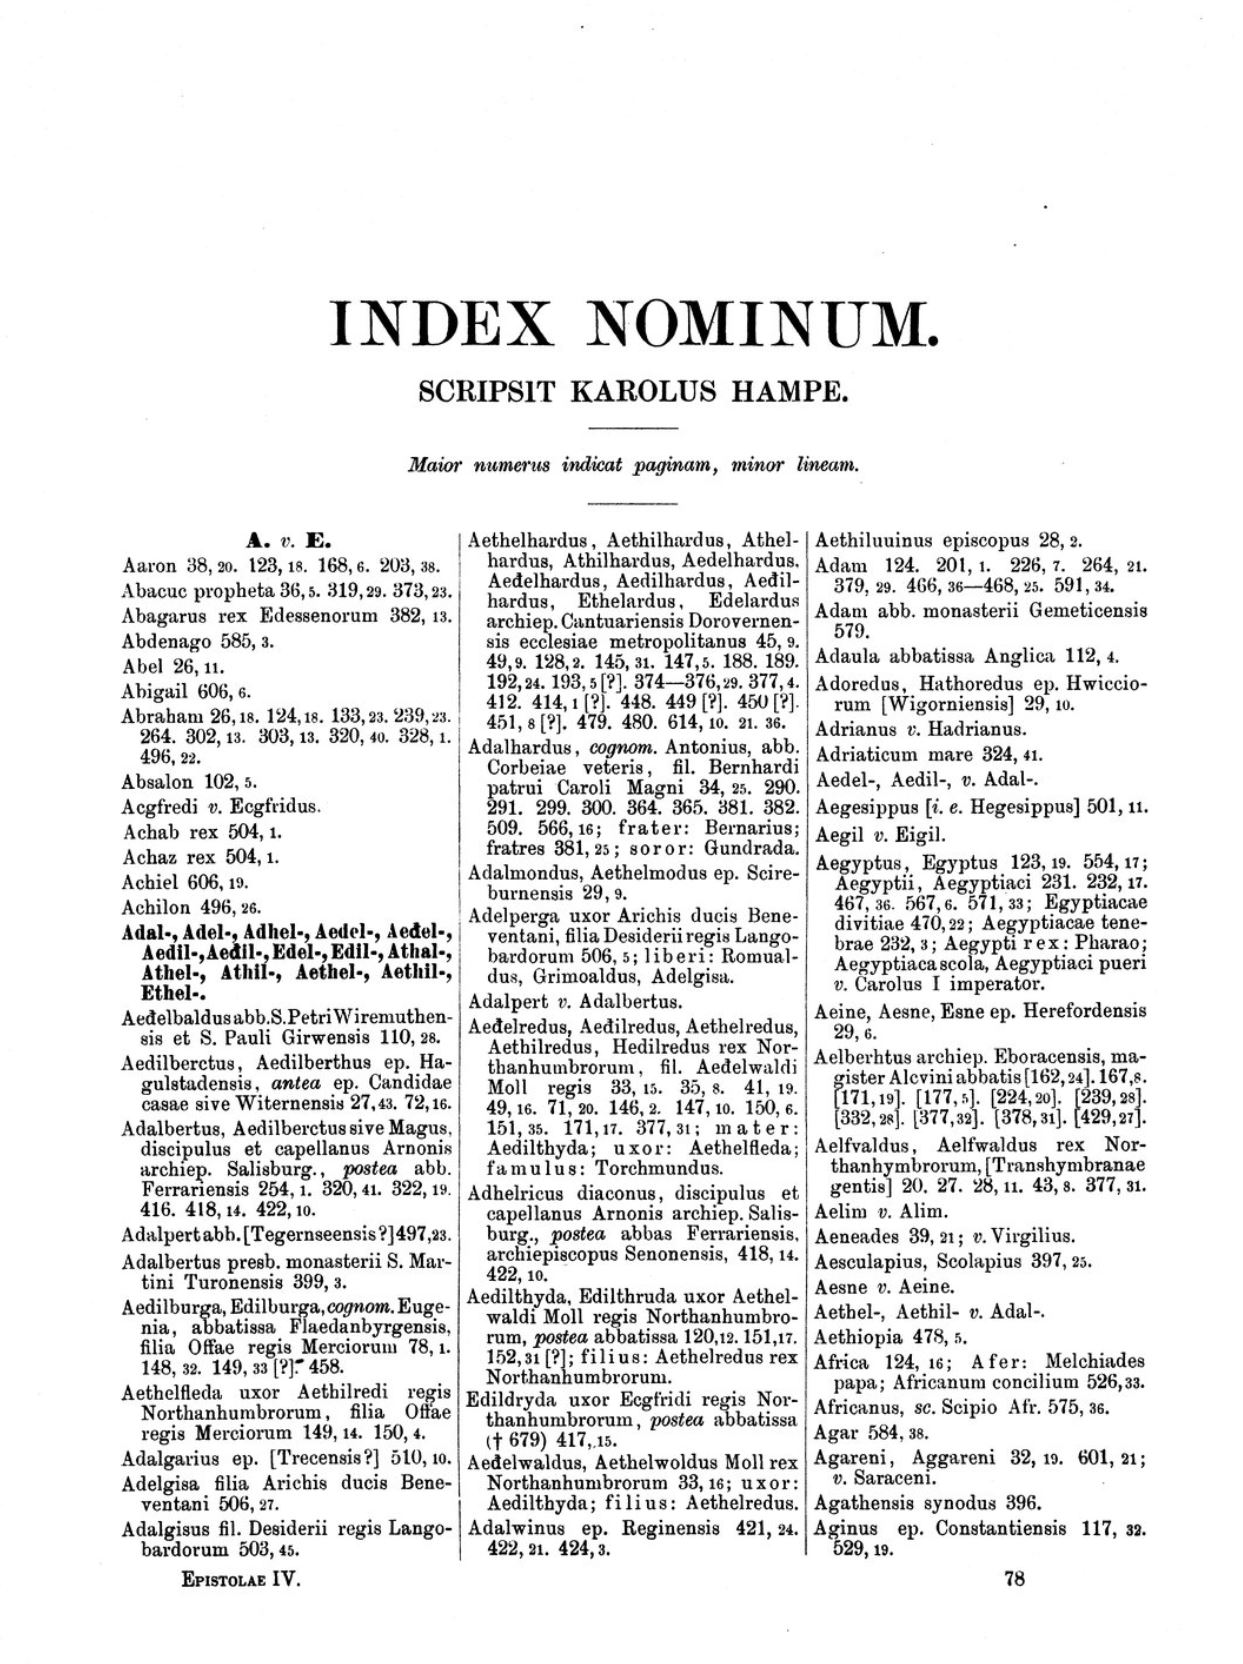

In [13]:
Image.open(file)

#### Blurring our text is going to allow us not to make our more legible, but to help us find better the structure of the text in the image

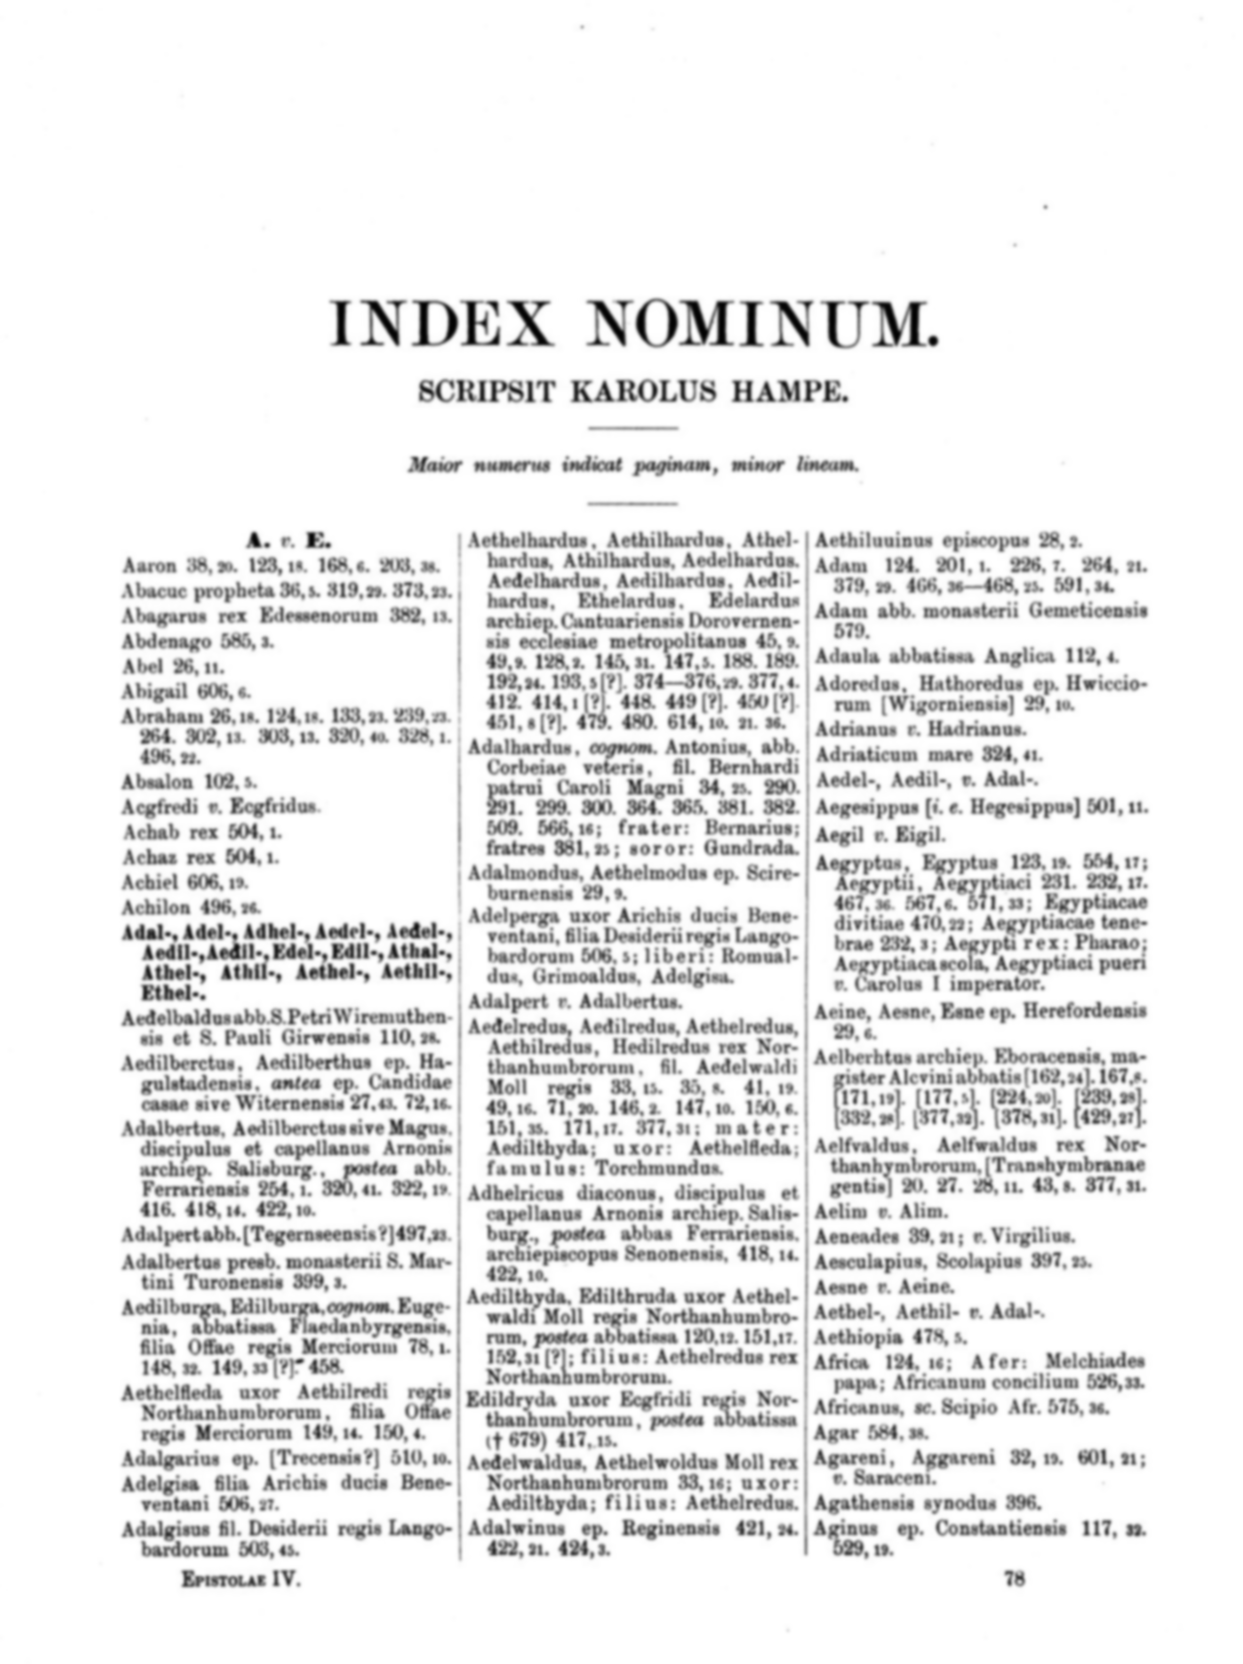

In [14]:
blur = cv2.GaussianBlur(gray, (7,7), 0)
cv2.imwrite('temp/index_blur.png', blur)
Image.open('temp/index_blur.png')

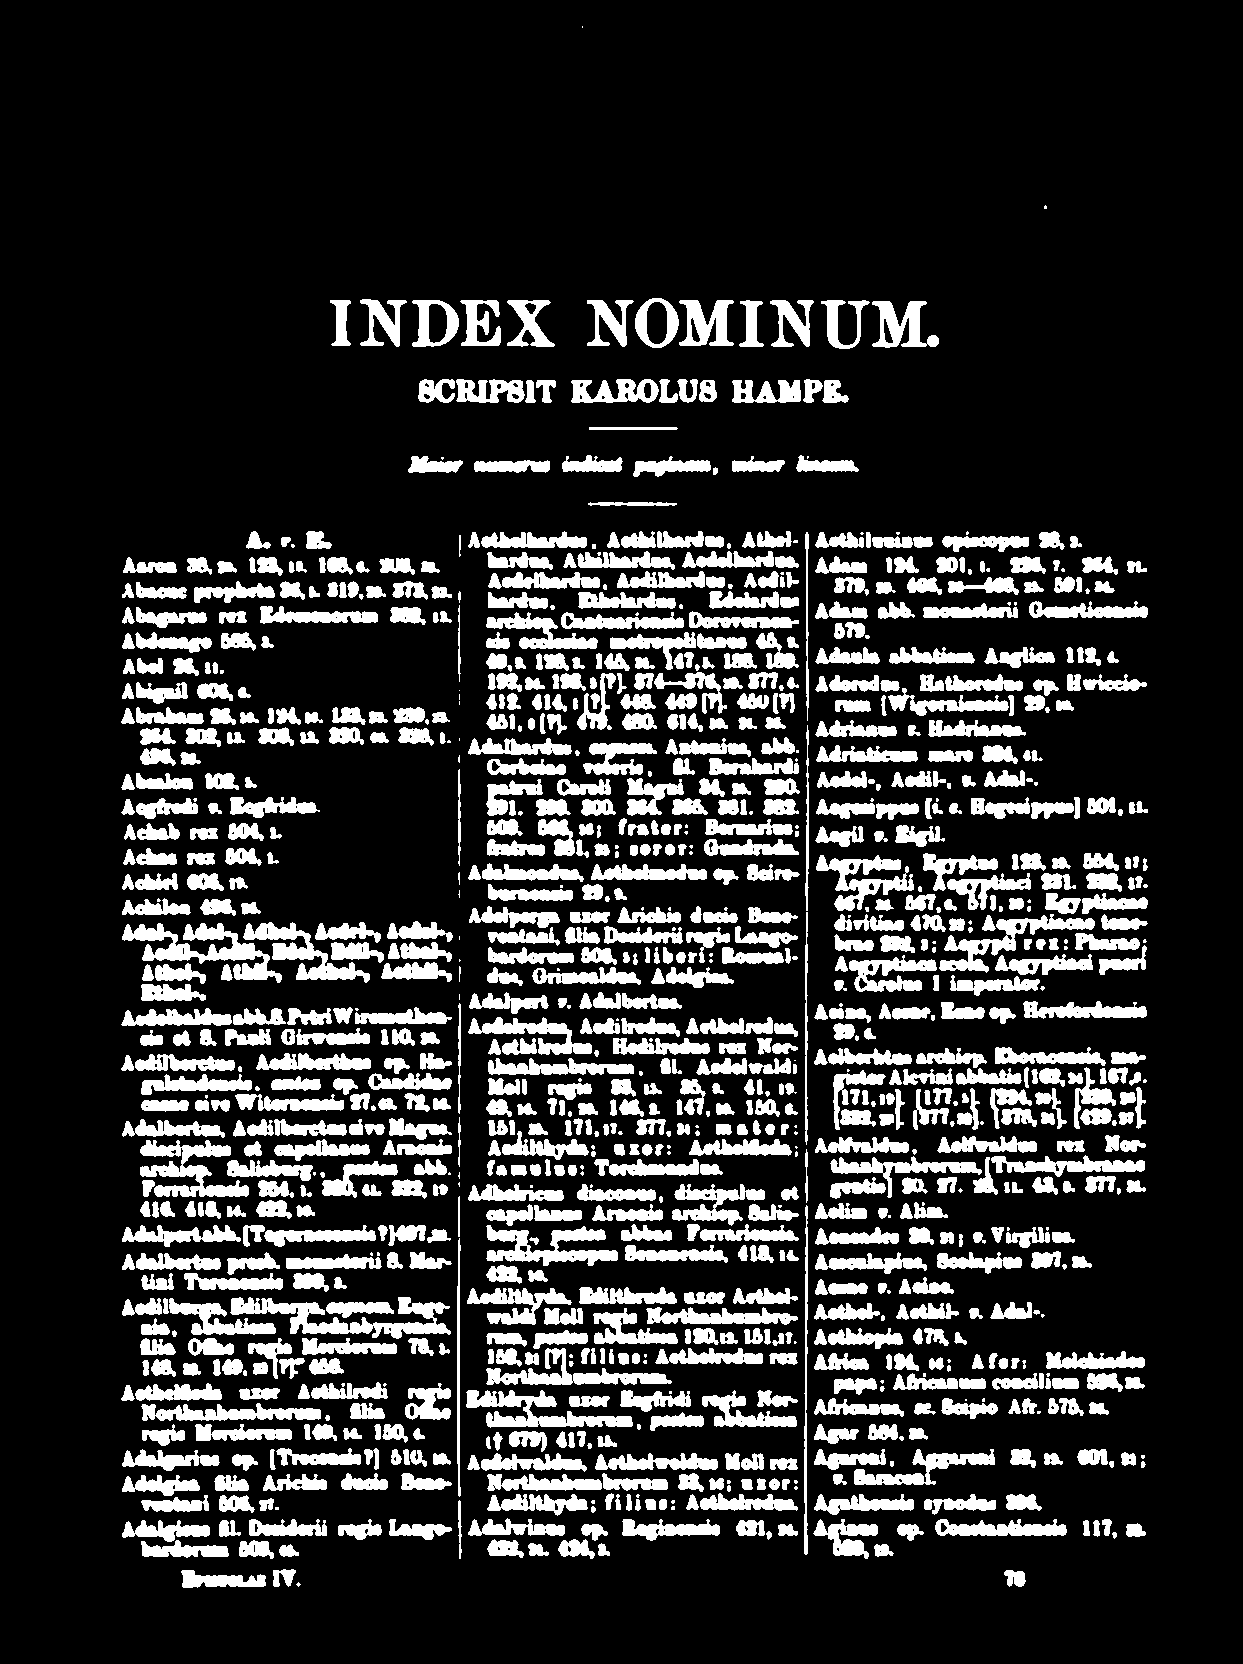

In [15]:
"""This line of code applies a binary threshold to an image using Otsu's method. 
It converts the blurred image into a white-and-black (binary) image by automatically 
determining the optimal threshold. Pixels below the threshold become black, and those above 
become white. This technique is often used for image segmentation, making it easier to 
distinguish objects in the image."""

thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

cv2.imwrite('temp/index_thresh.png', thresh)

Image.open('temp/index_thresh.png')

### Dilation and Erosion

In [16]:
# We're doing erosion to improve the structure of our image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 13))
cv2.imwrite('temp/index_kernel.png', kernel)

Image.open('temp/index_kernel.png')

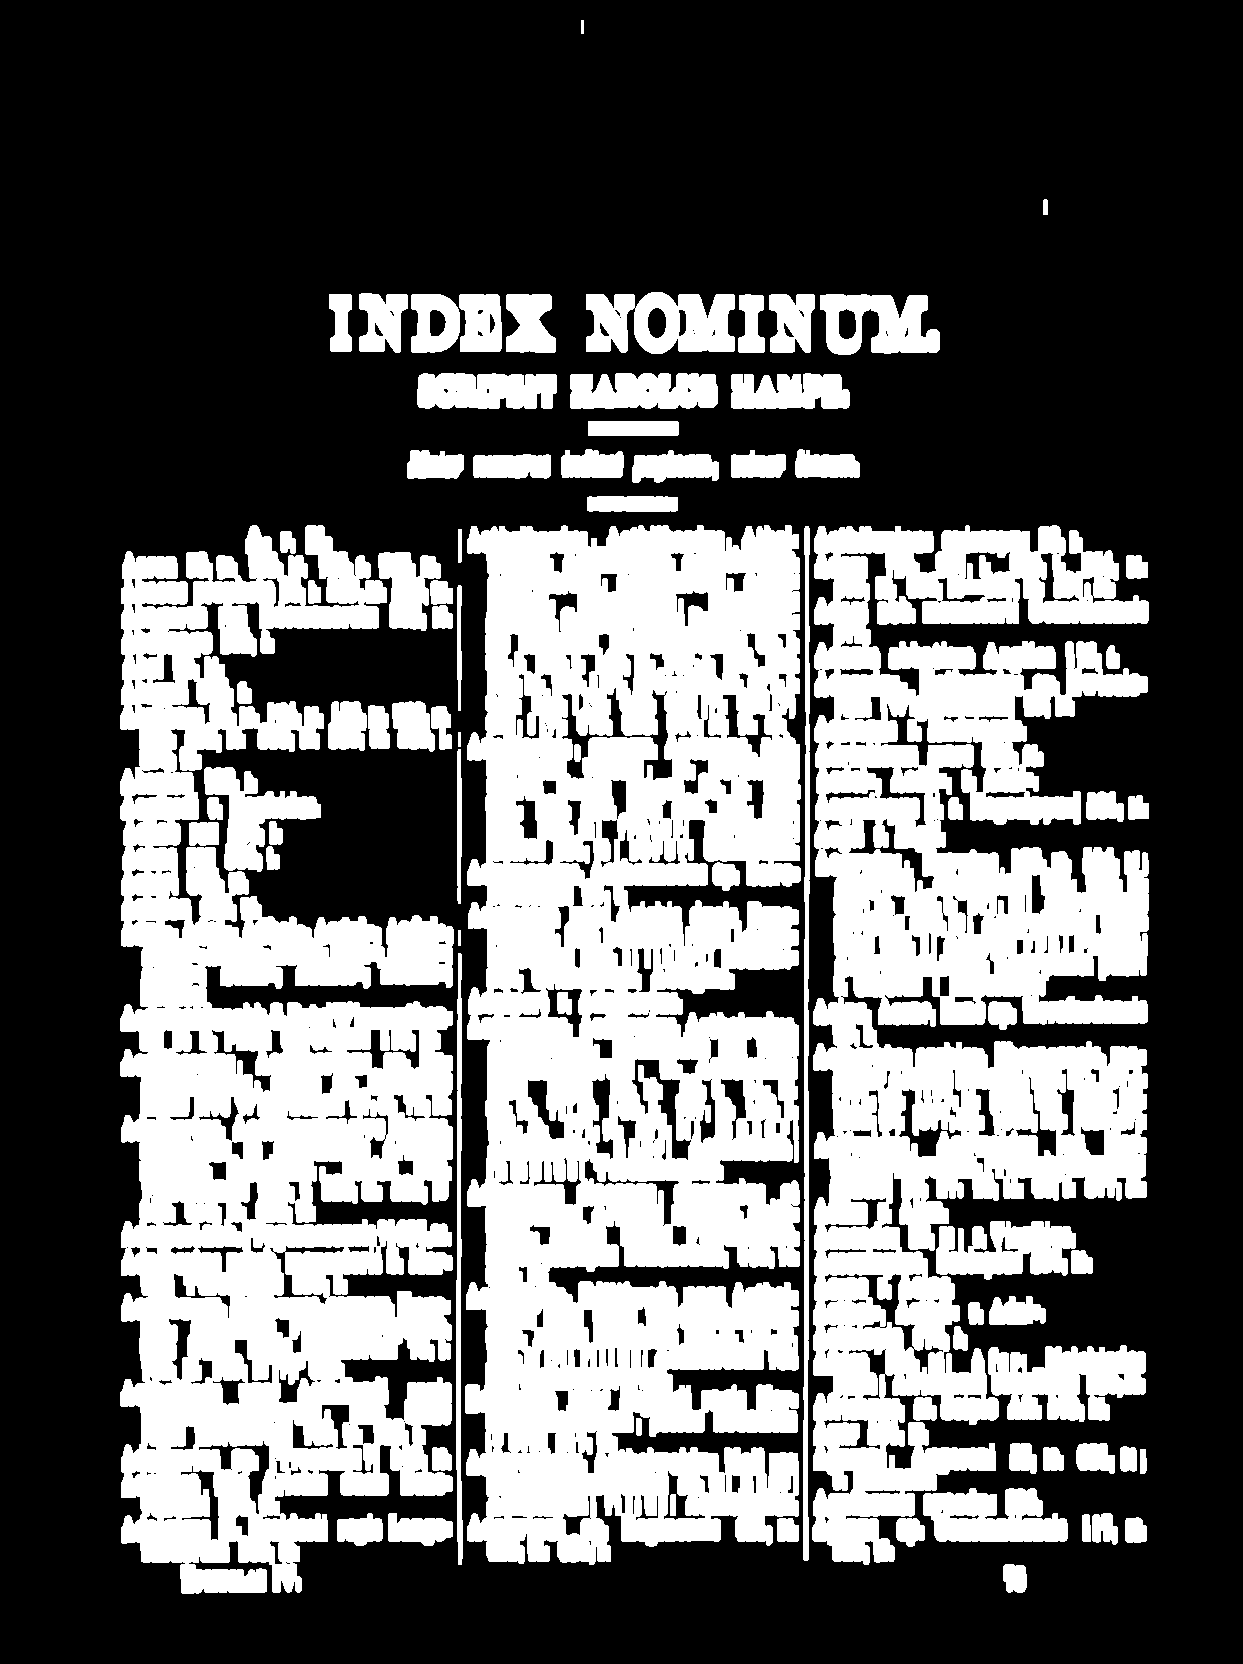

In [17]:
# This is is going to help us to create indivual components in our and segment the differents part of our text
dilate = cv2.dilate(thresh, kernel, iterations=1)
cv2.imwrite('temp/index_dilate.png', dilate)
Image.open('temp/index_dilate.png')

In [18]:
# Find the contours in the image. 
# cv2.RETR_EXTERNAL retrieves only the outer contours.
# cv2.CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments and leaves only their end points.
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Handle different OpenCV versions: 
# If the result has two elements (OpenCV 2 or 4), take the first one. 
# If it has three elements (OpenCV 3), take the second one.
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

cnts = sorted(cnts, key=lambda x : cv2.boundingRect(x)[0])

In [19]:
results = []

for c in cnts:
    x, y, w, h = cv2.boundingRect(c)

    if h > 200 and w > 20:
        roi = image[y:y+h, x: x+h] # Last column of the image
        
        cv2.imwrite('temp/index_roi.png', roi)

        cv2.rectangle(image, (x, y), (x+w, y+h), (36, 255, 12), 2)

        ocr_result = pytesseract.image_to_string(roi)

        ocr_result = ocr_result.split('\n')

        for item in ocr_result:
            results.append(item)

cv2.imwrite('temp/index_bbox.png', base_image)

# Image.open('temp/index_bbox.png')
# Image.open('temp/index_roi.png')

True

In [45]:
entities = []

for item in results:
    item = item.strip().replace("\n", '')
    item = item.split(' ')[0]
    if len(item) > 3:
        if item[0] == 'A' and '-' not in item:
            item = item.split('.')[0].replace(',', '').replace(';', '')
            entities.append(item)


In [46]:
entities = list(set(entities))
entities.sort()
entities

['A',
 'Aaron',
 'Abacuc',
 'Abagarus',
 'Abdenago',
 'Abel',
 'Abigail',
 'Abraham',
 'Absalon',
 'Acgfredi',
 'Achab',
 'Achaz',
 'Achiel',
 'Achilon',
 'Adalbertus',
 'Adalgarius',
 'Adalgisus',
 'Adalhardus',
 'Adalmondus',
 'Adalpert',
 'Adalpertabb',
 'Adalwinus',
 'Adam',
 'Adaula',
 'Adelgisa',
 'Adelperga',
 'Adhelricus',
 'Adoredus',
 'Adrianus',
 'Adriaticum',
 'Aedelbaldusabb',
 'Aedelhardus',
 'Aedelredus',
 'Aedelwaldus',
 'Aedilberctus',
 'Aedilburga',
 'Aedilthyda',
 'Aegesippus',
 'Aegil',
 'Aegyptiacascola',
 'Aegyptus',
 'Aeine',
 'Aelberhtus',
 'Aelfvaldus',
 'Aelim',
 'Aeneades',
 'Aesculapius',
 'Aesne',
 'Aethelfleda',
 'Aethelhardus',
 'Aethilredus',
 'Aethiluuinus',
 'Aethiopia',
 'Africa',
 'Africanus',
 'Agar',
 'Agareni',
 'Agathensis',
 'Aginus']